## Prepare the workstation

#### Import necessary packages and libraries

In [1]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#### Formatting of plots

In [2]:
# Set figure size.
sns.set(rc={'figure.figsize':(16, 8)})

# Colour palette to make charts look better.
sns.set_palette('colorblind') 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=22) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=20)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=18,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=18,color='#4f4e4e')  

# Font size of the legend.
plt.rc('legend', fontsize=18)

# Default text size.
plt.rc('font', size=18)  

In [3]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the CSV file into a dataframe
df = pd.read_csv('long_lat2.csv')

# View the data
df.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude
0,0,DY6,Midlands,26.84,2295440,7700,16:50.0,Dispatched,On Account,MFS,...,2023/04/18,34.46,United Kingdom,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682
1,1,OX18,Midlands,43.04,2292996,9759,47:47.5,Dispatched,Payment Gateway,DX Freight,...,2023/04/17,14.77,United Kingdom,29.24,0.219678,0.200025,1934,OX18,51.767526,-1.582311
2,2,CV5,Midlands,2.34,2285048,13038,58:30.3,Dispatched,Payment Gateway,DX Freight,...,2023/04/05,14.45,United Kingdom,28.50,0.044060,0.044323,597,CV5,52.424186,-1.562449
3,3,WS15,Midlands,29.80,2297608,15160,31:32.3,Dispatched,On Account,DX Express,...,2023/04/20,6.76,United Kingdom,8.56,0.053674,0.028439,2915,WS15,52.765303,-1.911238
4,4,MK1,Midlands,44.21,2281052,16152,07:41.9,Dispatched,On Account,DX Freight,...,2023/03/31,22.28,United Kingdom,48.74,0.090629,0.059524,1664,MK1,52.006042,-0.726102


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4119 non-null   int64  
 1   outward_code_x      4119 non-null   object 
 2   dist_centres        4119 non-null   object 
 3   distance            4119 non-null   float64
 4   OrderID             4119 non-null   int64  
 5   WebsiteID           4119 non-null   int64  
 6   OrderDate           4119 non-null   object 
 7   Status              4119 non-null   object 
 8   PaymentOption       4119 non-null   object 
 9   Courier             4119 non-null   object 
 10  ProductsExVAT       4119 non-null   float64
 11  DeliveryExVAT       4119 non-null   float64
 12  DateDespatched      4119 non-null   object 
 13  DeliveryCost        4119 non-null   float64
 14  country             4119 non-null   object 
 15  Weight_per_line     4119 non-null   float64
 16  Volume

#### The Elbow Method

The Elbow method is used to determine the optimal number of clusters in k-means clustering. It works by plotting the sum of squared distances (SS) between each data point and its assigned cluster center, as a function of the number of clusters. The idea is to choose the number of clusters where the decrease in SS begins to level off (the "elbow" point), indicating that the addition of more clusters provides diminishing returns in terms of clustering quality.

NOTE: The Elbow method doesn't always work well, though, especially if the data is not very clustered.

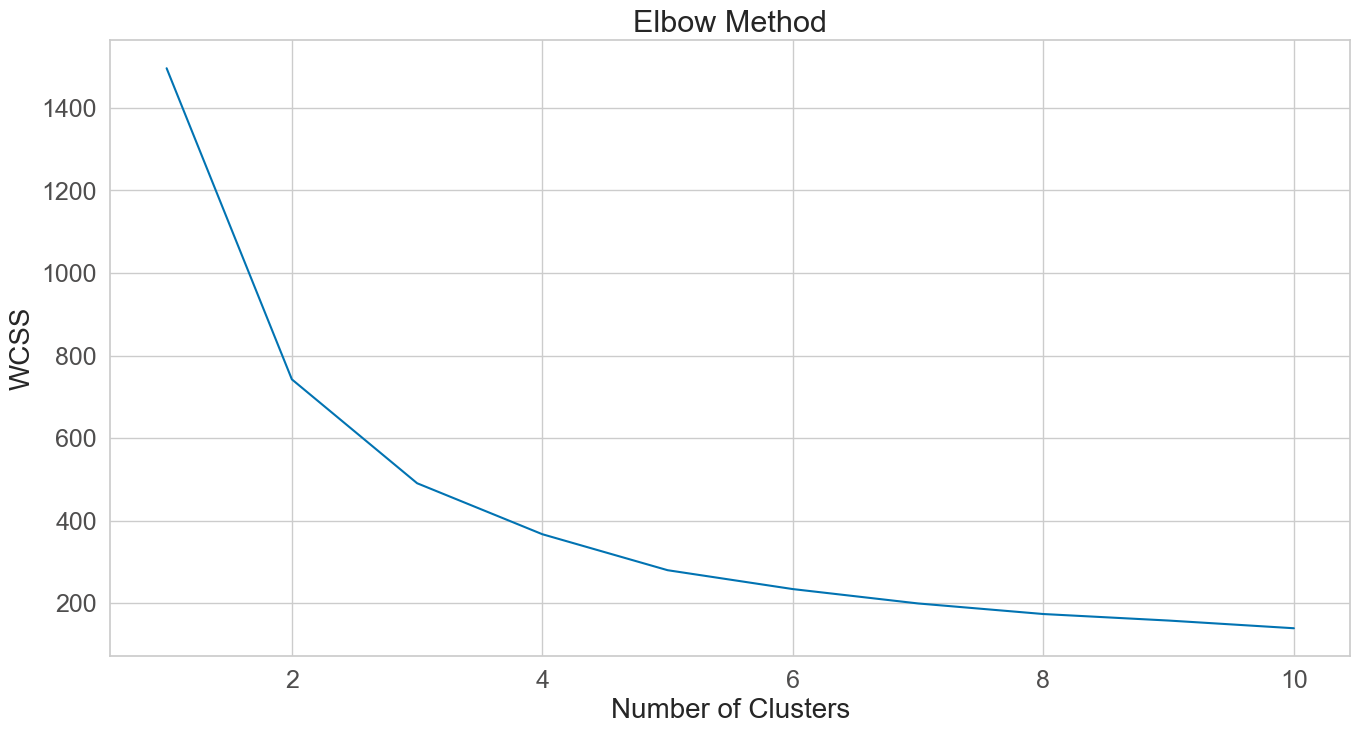

In [5]:
from sklearn.cluster import KMeans

# Select the latitude and longitude columns
data = df[['latitude', 'longitude']]

# Calculate WCSS (within cluster sum of squares) for different numbers of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow plot above shows an elbow point at around 4-5 clusters, where the decrease in SS starts to level off.

#### The Silhouette Method

The Silhouette method is also used to determine the number of clusters and is used alongside the Elbow method. It measures the quality of clustering by calculating the average distance between each data point and its assigned cluster, as well as the average distance to the nearest neighboring cluster. The silhouette score ranges from -1 to 1, with higher values indicating better clustering quality. It provides a succinct graphical representation of how well each object has been classified.

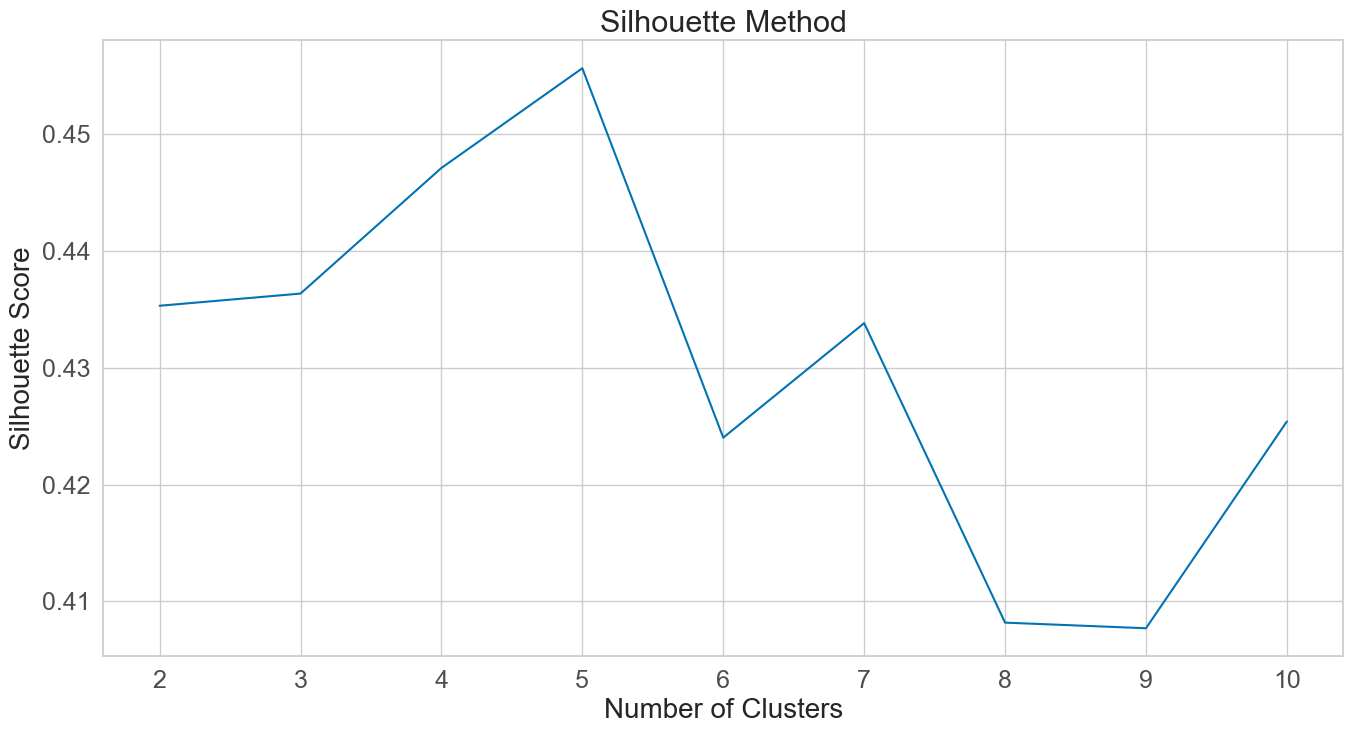

In [6]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data, labels))

# Plot the results
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### k-means clustering: 3 clusters

In [7]:
from sklearn.cluster import KMeans

# Extract latitude and longitude columns from the subset dataframe.
coordinates = df[['latitude', 'longitude']]

# Specify the number of clusters to create.
num_clusters = 3

# Create a K-means clustering model.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the customer coordinates.
kmeans.fit(coordinates)

# Get the cluster labels for each customer.
cluster_labels = kmeans.labels_

# Add the cluster labels to the subset dataframe.
df['Cluster'] = cluster_labels

# View the subset dataframe with cluster labels.
print(df.head())

   Unnamed: 0 outward_code_x dist_centres  distance  OrderID  WebsiteID  \
0           0            DY6     Midlands     26.84  2295440       7700   
1           1           OX18     Midlands     43.04  2292996       9759   
2           2            CV5     Midlands      2.34  2285048      13038   
3           3           WS15     Midlands     29.80  2297608      15160   
4           4            MK1     Midlands     44.21  2281052      16152   

  OrderDate      Status    PaymentOption     Courier  ...  DeliveryCost  \
0   16:50.0  Dispatched       On Account         MFS  ...         34.46   
1   47:47.5  Dispatched  Payment Gateway  DX Freight  ...         14.77   
2   58:30.3  Dispatched  Payment Gateway  DX Freight  ...         14.45   
3   31:32.3  Dispatched       On Account  DX Express  ...          6.76   
4   07:41.9  Dispatched       On Account  DX Freight  ...         22.28   

          country Weight_per_line  Volume_per_line_m3 Pallet_per_line    id  \
0  United Kingdom  

Cluster 0: 910 points
Cluster 1: 1830 points
Cluster 2: 1379 points


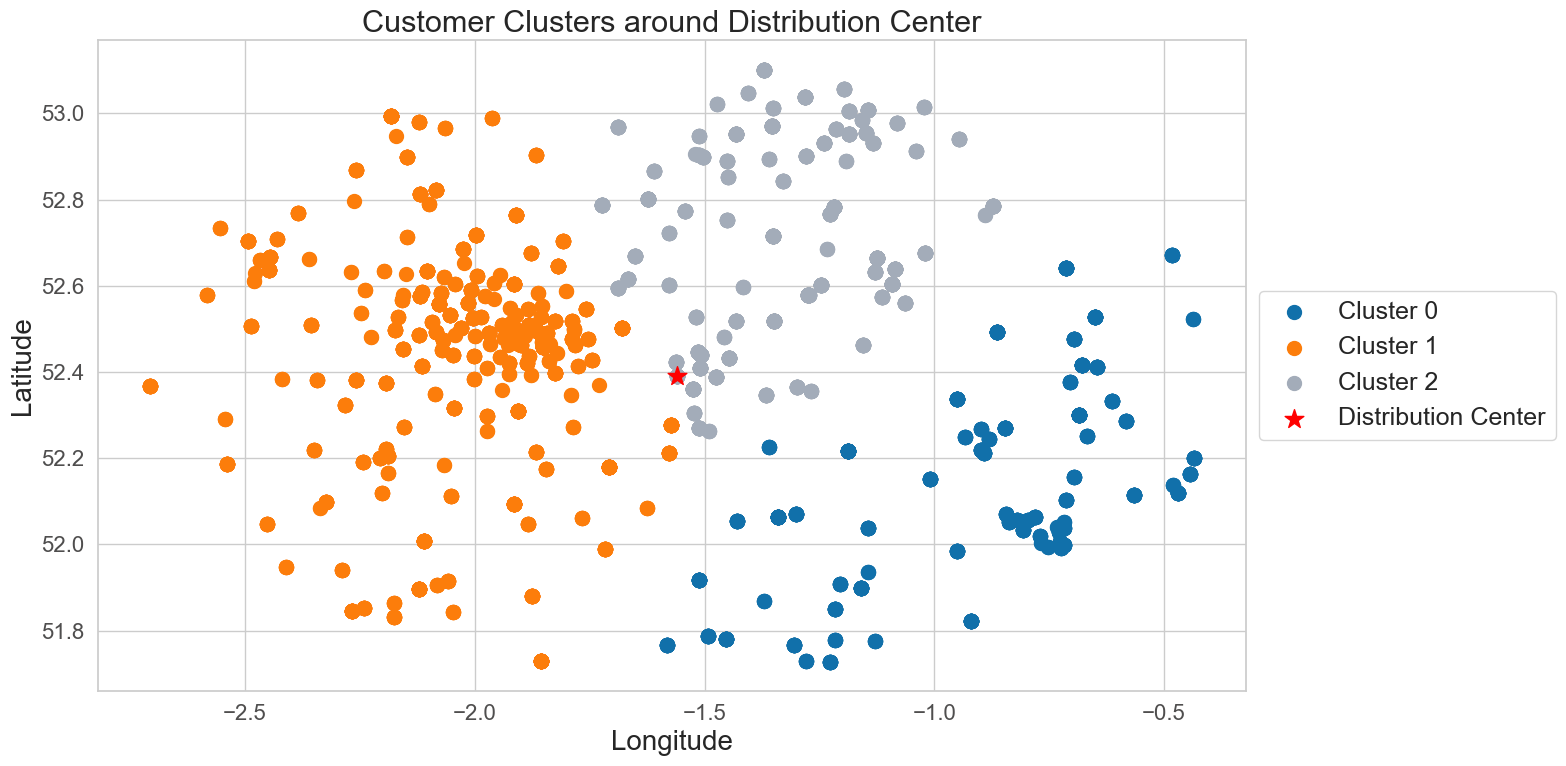

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert latitude and longitude columns to float.
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Set the coordinates of the distribution center.
distribution_center_lat = 52.390339
distribution_center_lon = -1.56066

# Calculate the angles for each customer location relative to the distribution center.
angles = np.arctan2(df['latitude'] - distribution_center_lat, 
                    df['longitude'] - distribution_center_lon)

# Assign cluster labels to each data point.
df['Cluster'] = kmeans.labels_

# Set plot size.
plt.figure(figsize=(16, 8))

# Define the color palette.
colors = ["#1170aa", "#fc7d0b", "#a3acb9"]

# Create scatter plots for each cluster.
legend_elements = []
for cluster_label in range(3):
    cluster_points = df[df['Cluster'] == cluster_label]
    scatter = plt.scatter(cluster_points['longitude'], 
                          cluster_points['latitude'], c=colors[cluster_label], s=100)
    legend_elements.append(scatter)

    # Print the size of each cluster.
    cluster_size = len(cluster_points)
    print(f"Cluster {cluster_label}: {cluster_size} points")

# Add the distribution center as a red star.
plt.scatter(distribution_center_lon, distribution_center_lat, 
            marker='*', color='red', s=200, label='Distribution Center', zorder=10)

# Create a dummy scatter plot for the distribution center in the legend.
dummy_scatter = plt.scatter([], [], marker='*', 
                            color='red', s=200, label='Distribution Center')

# Add the dummy scatter plot to the legend elements.
legend_elements.append(dummy_scatter)

# Set the plot title and labels.
plt.title('Customer Clusters around Distribution Center', fontsize=22)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

# Set the tick label font size.
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Move the legend outside the plot.
plt.legend(legend_elements, ['Cluster 0', 'Cluster 1', 
                             'Cluster 2', 'Distribution Center'], 
           fontsize=18, 
           loc='center left', bbox_to_anchor=(1, 0.5))

# Save the chart.
plt.tight_layout()
filename = 'customer_clusters.png'
plt.savefig(filename, bbox_inches='tight')

# Show the plot.
plt.show()

#### k-means clustering: 4 clusters

In [9]:
from sklearn.cluster import KMeans

# Extract latitude and longitude columns from the subset dataframe.
coordinates = df[['latitude', 'longitude']]

# Specify the number of clusters to create.
num_clusters = 4

# Create a K-means clustering model.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the customer coordinates.
kmeans.fit(coordinates)

# Get the cluster labels for each customer.
cluster_labels = kmeans.labels_

# Add the cluster labels to the subset dataframe.
df['Cluster'] = cluster_labels

# View the subset dataframe with cluster labels.
print(df.head())

   Unnamed: 0 outward_code_x dist_centres  distance  OrderID  WebsiteID  \
0           0            DY6     Midlands     26.84  2295440       7700   
1           1           OX18     Midlands     43.04  2292996       9759   
2           2            CV5     Midlands      2.34  2285048      13038   
3           3           WS15     Midlands     29.80  2297608      15160   
4           4            MK1     Midlands     44.21  2281052      16152   

  OrderDate      Status    PaymentOption     Courier  ...  DeliveryCost  \
0   16:50.0  Dispatched       On Account         MFS  ...         34.46   
1   47:47.5  Dispatched  Payment Gateway  DX Freight  ...         14.77   
2   58:30.3  Dispatched  Payment Gateway  DX Freight  ...         14.45   
3   31:32.3  Dispatched       On Account  DX Express  ...          6.76   
4   07:41.9  Dispatched       On Account  DX Freight  ...         22.28   

          country Weight_per_line  Volume_per_line_m3 Pallet_per_line    id  \
0  United Kingdom  

Cluster 0: 760 points
Cluster 1: 1667 points
Cluster 2: 612 points
Cluster 3: 1080 points


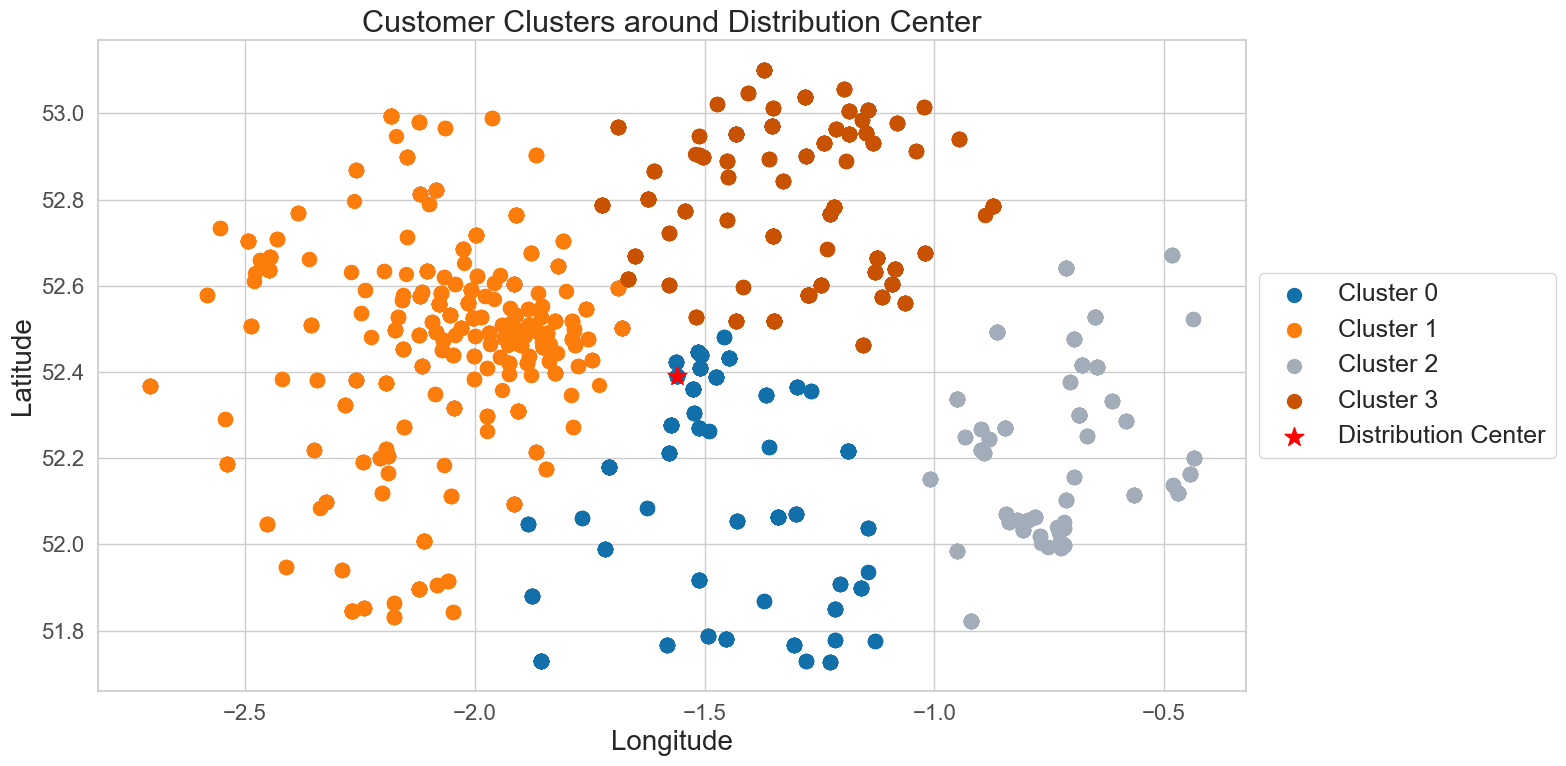

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Convert latitude and longitude columns to float.
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Set the coordinates of the distribution center.
distribution_center_lat = 52.390339
distribution_center_lon = -1.56066

# Calculate the angles for each customer location relative to the distribution center.
angles = np.arctan2(df['latitude'] - distribution_center_lat, 
                    df['longitude'] - distribution_center_lon)

# Assign cluster labels to each data point.
df['Cluster'] = kmeans.labels_

# Set plot size.
plt.figure(figsize=(16, 8))

# Define the color palette.
colors = ["#1170aa", "#fc7d0b", "#a3acb9", "#c85200"]

# Create scatter plots for each cluster.
legend_elements = []
for cluster_label in range(4):
    cluster_points = df[df['Cluster'] == cluster_label]
    scatter = plt.scatter(cluster_points['longitude'], 
                          cluster_points['latitude'], c=colors[cluster_label], s=100)
    legend_elements.append(scatter)

    # Print the size of each cluster.
    cluster_size = len(cluster_points)
    print(f"Cluster {cluster_label}: {cluster_size} points")

# Add the distribution center as a red star.
plt.scatter(distribution_center_lon, distribution_center_lat, 
            marker='*', color='red', s=200, label='Distribution Center', zorder=10)

# Create a dummy scatter plot for the distribution center in the legend.
dummy_scatter = plt.scatter([], [], marker='*', 
                            color='red', s=200, label='Distribution Center')

# Add the dummy scatter plot to the legend elements.
legend_elements.append(dummy_scatter)

# Set the plot title and labels.
plt.title('Customer Clusters around Distribution Center', fontsize=22)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

# Set the tick label font size.
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Move the legend outside the plot.
plt.legend(legend_elements, ['Cluster 0', 'Cluster 1', 
                             'Cluster 2', 'Cluster 3', 
                             'Distribution Center'], fontsize=18, 
           loc='center left', bbox_to_anchor=(1, 0.5))

# Save the chart.
plt.tight_layout()
filename = 'customer_clusters.png'
plt.savefig(filename, bbox_inches='tight')

# Show the plot.
plt.show()

#### k-means clustering: 5 clusters

In [11]:
from sklearn.cluster import KMeans

# Extract latitude and longitude columns from the subset dataframe.
coordinates = df[['latitude', 'longitude']]

# Specify the number of clusters to create.
num_clusters = 5

# Create a K-means clustering model.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the customer coordinates.
kmeans.fit(coordinates)

# Get the cluster labels for each customer.
cluster_labels = kmeans.labels_

# Add the cluster labels to the subset dataframe.
df['Cluster'] = cluster_labels

# View the subset dataframe with cluster labels.
print(df.head())

   Unnamed: 0 outward_code_x dist_centres  distance  OrderID  WebsiteID  \
0           0            DY6     Midlands     26.84  2295440       7700   
1           1           OX18     Midlands     43.04  2292996       9759   
2           2            CV5     Midlands      2.34  2285048      13038   
3           3           WS15     Midlands     29.80  2297608      15160   
4           4            MK1     Midlands     44.21  2281052      16152   

  OrderDate      Status    PaymentOption     Courier  ...  DeliveryCost  \
0   16:50.0  Dispatched       On Account         MFS  ...         34.46   
1   47:47.5  Dispatched  Payment Gateway  DX Freight  ...         14.77   
2   58:30.3  Dispatched  Payment Gateway  DX Freight  ...         14.45   
3   31:32.3  Dispatched       On Account  DX Express  ...          6.76   
4   07:41.9  Dispatched       On Account  DX Freight  ...         22.28   

          country Weight_per_line  Volume_per_line_m3 Pallet_per_line    id  \
0  United Kingdom  

Cluster 0: 421 points
Cluster 1: 1015 points
Cluster 2: 612 points
Cluster 3: 1370 points
Cluster 4: 701 points


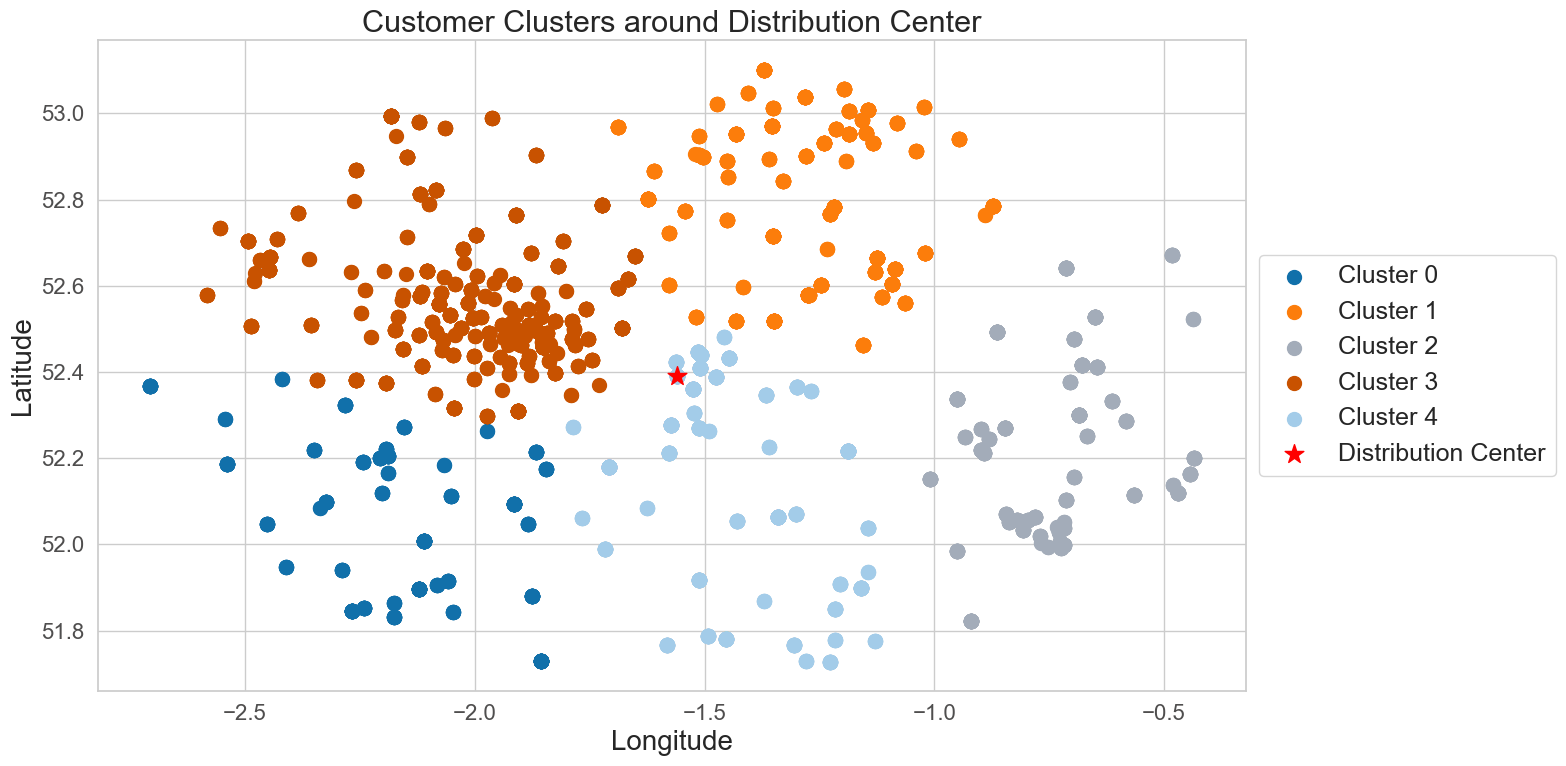

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Convert latitude and longitude columns to float.
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Set the coordinates of the distribution center.
distribution_center_lat = 52.390339
distribution_center_lon = -1.56066

# Calculate the angles for each customer location relative to the distribution center.
angles = np.arctan2(df['latitude'] - distribution_center_lat, 
                    df['longitude'] - distribution_center_lon)

# Assign cluster labels to each data point.
df['Cluster'] = kmeans.labels_

# Set plot size.
plt.figure(figsize=(16, 8))

# Define the color palette.
colors = ["#1170aa", "#fc7d0b", "#a3acb9", "#c85200", "#a3cce9"]

# Create scatter plots for each cluster.
legend_elements = []
for cluster_label in range(5):
    cluster_points = df[df['Cluster'] == cluster_label]
    scatter = plt.scatter(cluster_points['longitude'], 
                          cluster_points['latitude'], c=colors[cluster_label], s=100)
    legend_elements.append(scatter)

    # Print the size of each cluster.
    cluster_size = len(cluster_points)
    print(f"Cluster {cluster_label}: {cluster_size} points")

# Add the distribution center as a red star.
plt.scatter(distribution_center_lon, distribution_center_lat, 
            marker='*', color='red', s=200, label='Distribution Center', zorder=10)

# Create a dummy scatter plot for the distribution center in the legend.
dummy_scatter = plt.scatter([], [], marker='*', 
                            color='red', s=200, label='Distribution Center')

# Add the dummy scatter plot to the legend elements.
legend_elements.append(dummy_scatter)

# Set the plot title and labels.
plt.title('Customer Clusters around Distribution Center', fontsize=22)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

# Set the tick label font size.
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Move the legend outside the plot.
plt.legend(legend_elements, ['Cluster 0', 'Cluster 1', 
                             'Cluster 2', 'Cluster 3', 
                             'Cluster 4', 'Distribution Center'], fontsize=18, 
           loc='center left', bbox_to_anchor=(1, 0.5))

# Save the chart.
plt.tight_layout()
filename = 'customer_clusters.png'
plt.savefig(filename, bbox_inches='tight')

# Show the plot
plt.show()

#### Add cluster labels to the dataframe

In [13]:
# Add the cluster labels to the df dataframe.
df['Cluster'] = cluster_labels

# View the updated dataframe with cluster labels.
df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
0,0,DY6,Midlands,26.84,2295440,7700,16:50.0,Dispatched,On Account,MFS,...,34.46,United Kingdom,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,3
1,1,OX18,Midlands,43.04,2292996,9759,47:47.5,Dispatched,Payment Gateway,DX Freight,...,14.77,United Kingdom,29.24,0.219678,0.200025,1934,OX18,51.767526,-1.582311,4
2,2,CV5,Midlands,2.34,2285048,13038,58:30.3,Dispatched,Payment Gateway,DX Freight,...,14.45,United Kingdom,28.50,0.044060,0.044323,597,CV5,52.424186,-1.562449,4
3,3,WS15,Midlands,29.80,2297608,15160,31:32.3,Dispatched,On Account,DX Express,...,6.76,United Kingdom,8.56,0.053674,0.028439,2915,WS15,52.765303,-1.911238,3
4,4,MK1,Midlands,44.21,2281052,16152,07:41.9,Dispatched,On Account,DX Freight,...,22.28,United Kingdom,48.74,0.090629,0.059524,1664,MK1,52.006042,-0.726102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,NG8,Midlands,42.25,2286675,847974,29:14.1,Dispatched,Payment Gateway,DX Freight,...,11.36,United Kingdom,21.00,1.250000,1.250000,1820,NG8,52.964498,-1.213406,1
4115,4115,MK43,Midlands,46.14,2299291,848793,10:04.2,Dispatched,Payment Gateway,DX Express,...,6.76,United Kingdom,7.20,0.019250,0.061473,1681,MK43,52.115500,-0.566550,2
4116,4116,GL1,Midlands,47.05,2286559,851414,29:21.5,Dispatched,Payment Gateway,DX Express,...,6.79,United Kingdom,13.14,0.140650,0.082143,1009,GL1,51.853212,-2.242429,0
4117,4117,NN11,Midlands,19.77,2288157,858296,41:11.4,Dispatched,Paypal,DX Freight,...,10.92,United Kingdom,13.20,0.144000,0.100000,1826,NN11,52.217508,-1.187850,4


#### Create five subsets of the data

In [14]:
# Create subsets for each cluster
cluster_0_df = df[df['Cluster'] == 0]
cluster_1_df = df[df['Cluster'] == 1]
cluster_2_df = df[df['Cluster'] == 2]
cluster_3_df = df[df['Cluster'] == 3]
cluster_4_df = df[df['Cluster'] == 4]

# Print the number of data points in each cluster
print(f"Cluster 0: {len(cluster_0_df)} points")
print(f"Cluster 1: {len(cluster_1_df)} points")
print(f"Cluster 2: {len(cluster_2_df)} points")
print(f"Cluster 3: {len(cluster_3_df)} points")
print(f"Cluster 4: {len(cluster_4_df)} points")

Cluster 0: 421 points
Cluster 1: 1015 points
Cluster 2: 612 points
Cluster 3: 1370 points
Cluster 4: 701 points


#### View the cluster subsets

In [15]:
# View cluster 0.
cluster_0_df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
6,6,GL54,Midlands,37.69,2283262,19273,19:06.0,Dispatched,On Account,DX Freight,...,23.83,United Kingdom,52.48,0.297153,0.243302,1029,GL54,51.880284,-1.875728,0
7,7,GL54,Midlands,37.69,2286006,19273,35:16.0,Dispatched,On Account,DX Freight,...,16.38,United Kingdom,33.35,0.246913,0.153968,1029,GL54,51.880284,-1.875728,0
11,11,GL7,Midlands,47.34,2285193,32070,02:54.2,Dispatched,Payment Gateway,DX Freight,...,37.66,United Kingdom,88.08,0.278136,0.152778,1033,GL7,51.729745,-1.855955,0
12,12,GL7,Midlands,47.34,2292551,32070,53:12.5,Dispatched,Payment Gateway,DX Freight,...,37.11,United Kingdom,88.00,0.784000,0.833333,1033,GL7,51.729745,-1.855955,0
17,17,GL54,Midlands,37.69,2276295,36077,42:00.2,Dispatched,Payment Gateway,MFS,...,76.73,United Kingdom,313.56,2.852720,1.111111,1029,GL54,51.880284,-1.875728,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,4049,HR8,Midlands,44.51,2286013,591492,58:49.0,Dispatched,Payment Gateway,DX Express,...,6.79,United Kingdom,4.02,0.026010,0.025000,1140,HR8,52.048396,-2.451934,0
4065,4065,GL18,Midlands,47.21,2285209,684782,08:49.8,Dispatched,Payment Gateway,MFS,...,111.65,United Kingdom,167.04,3.555160,2.142857,1018,GL18,51.948789,-2.410720,0
4096,4096,SY8,Midlands,48.36,2298795,775429,02:04.6,Dispatched,Payment Gateway,DX Express,...,6.76,United Kingdom,7.39,0.018472,0.023181,2595,SY8,52.368745,-2.706694,0
4110,4110,GL7,Midlands,47.34,2298380,829203,42:00.4,Dispatched,Paypal,DX Express,...,6.76,United Kingdom,7.20,0.056000,0.062500,1033,GL7,51.729745,-1.855955,0


In [16]:
# View cluster 1.
cluster_1_df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
5,5,NG8,Midlands,42.25,2296541,16936,22:10.8,Dispatched,On Account,DX Express,...,8.62,United Kingdom,25.01,0.110824,0.105135,1820,NG8,52.964498,-1.213406,1
8,8,LE7,Midlands,30.13,2291049,24283,51:04.9,Dispatched,On Account,DX Freight,...,31.33,United Kingdom,87.40,0.151600,0.142222,1473,LE7,52.677164,-1.020786,1
10,10,DE14,Midlands,28.46,2298194,31283,00:54.4,Dispatched,On Account,DX Express,...,8.93,United Kingdom,26.94,0.114950,0.098685,648,DE14,52.800485,-1.622900,1
13,13,LE9,Midlands,17.70,2277868,34120,08:53.6,Dispatched,Payment Gateway,DX Express,...,7.43,United Kingdom,21.68,0.190230,0.187500,1476,LE9,52.578862,-1.275923,1
19,19,LE2,Midlands,24.61,2294238,36383,31:56.1,Dispatched,On Account,MFS,...,39.15,United Kingdom,138.41,0.376917,0.227381,1463,LE2,52.603876,-1.092301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,4090,DE73,Midlands,32.26,2286978,763584,23:30.1,Dispatched,Payment Gateway,DX Express,...,8.66,United Kingdom,25.90,0.057143,0.047619,664,DE73,52.852247,-1.448961,1
4093,4093,DE55,Midlands,49.74,2280930,767927,48:35.2,Dispatched,Paypal,DX Express,...,6.80,United Kingdom,5.32,0.032737,0.018403,658,DE55,53.101000,-1.371000,1
4095,4095,NG15,Midlands,48.45,2286397,769034,56:53.1,Dispatched,Payment Gateway,DX Express,...,6.79,United Kingdom,19.46,0.141575,0.102804,1798,NG15,53.056030,-1.196679,1
4109,4109,DE55,Midlands,49.74,2287808,818695,22:02.1,Dispatched,Payment Gateway,DX Express,...,6.77,United Kingdom,10.00,0.080600,0.050000,658,DE55,53.101000,-1.371000,1


In [17]:
# View cluster 2.
cluster_2_df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
4,4,MK1,Midlands,44.21,2281052,16152,07:41.9,Dispatched,On Account,DX Freight,...,22.28,United Kingdom,48.74,0.090629,0.059524,1664,MK1,52.006042,-0.726102,2
44,44,NN18,Midlands,36.90,2281854,49181,34:29.1,Dispatched,On Account,MFS,...,76.73,United Kingdom,207.15,2.014415,1.168214,1833,NN18,52.477116,-0.696431,2
50,50,MK43,Midlands,46.14,2281830,52460,06:25.5,Dispatched,On Account,DX Freight,...,46.36,United Kingdom,110.79,2.337000,0.883333,1681,MK43,52.115500,-0.566550,2
51,51,MK43,Midlands,46.14,2294697,52460,13:21.7,Dispatched,On Account,DX Freight,...,34.03,United Kingdom,79.74,0.132000,0.133333,1681,MK43,52.115500,-0.566550,2
55,55,NN2,Midlands,29.21,2283640,52592,49:31.6,Dispatched,On Account,DX Express,...,9.59,United Kingdom,28.80,0.124000,0.044444,1834,NN2,52.268160,-0.898355,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,4061,MK18,Midlands,38.07,2296314,669579,52:30.4,Dispatched,Payment Gateway,DX Freight,...,10.92,United Kingdom,14.08,0.762620,0.505787,1673,MK18,51.985593,-0.950963,2
4084,4084,MK8,Midlands,40.34,2292695,744612,21:50.4,Dispatched,Paypal,DX Freight,...,29.79,United Kingdom,68.07,0.353704,0.283383,1689,MK8,52.033262,-0.806771,2
4086,4086,NN14,Midlands,38.59,2283102,759754,05:26.5,Dispatched,Payment Gateway,DX Express,...,6.80,United Kingdom,14.85,0.096200,0.095455,1829,NN14,52.412694,-0.645936,2
4087,4087,NN14,Midlands,38.59,2297123,759754,04:24.0,Dispatched,Payment Gateway,DX Express,...,6.76,United Kingdom,10.65,0.068200,0.072727,1829,NN14,52.412694,-0.645936,2


In [18]:
# View cluster 3.
cluster_3_df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
0,0,DY6,Midlands,26.84,2295440,7700,16:50.0,Dispatched,On Account,MFS,...,34.46,United Kingdom,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,3
3,3,WS15,Midlands,29.80,2297608,15160,31:32.3,Dispatched,On Account,DX Express,...,6.76,United Kingdom,8.56,0.053674,0.028439,2915,WS15,52.765303,-1.911238,3
14,14,ST4,Midlands,49.24,2275327,35595,54:11.3,Dispatched,Paypal,DX Freight,...,30.44,United Kingdom,69.80,0.376600,0.440385,2536,ST4,52.995000,-2.183000,3
15,15,ST4,Midlands,49.24,2276565,35595,09:46.3,Dispatched,Paypal,DX Freight,...,28.50,United Kingdom,65.00,0.333400,0.397115,2536,ST4,52.995000,-2.183000,3
16,16,ST4,Midlands,49.24,2279839,35595,18:49.5,Dispatched,Paypal,DX Freight,...,20.34,United Kingdom,44.00,0.392000,0.416667,2536,ST4,52.995000,-2.183000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,4101,B62,Midlands,20.80,2282546,796459,20:33.9,Dispatched,On Account,DX Freight,...,27.33,United Kingdom,61.48,0.422720,0.327273,90,B62,52.439416,-2.047562,3
4106,4106,WV10,Midlands,28.36,2295133,808666,06:36.1,Dispatched,Payment Gateway,DX Freight,...,28.64,United Kingdom,65.08,0.212077,0.112847,2925,WV10,52.633707,-2.103840,3
4112,4112,B47,Midlands,13.42,2291723,837546,52:36.5,Dispatched,Payment Gateway,DX Express,...,10.81,United Kingdom,32.80,0.141900,0.200000,82,B47,52.392856,-1.878858,3
4113,4113,ST16,Midlands,37.43,2293292,838417,20:32.1,Dispatched,Paypal,DX Freight,...,12.46,United Kingdom,24.00,0.251000,0.119048,2528,ST16,52.812198,-2.120189,3


In [19]:
# View cluster 4.
cluster_4_df

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,Cluster
1,1,OX18,Midlands,43.04,2292996,9759,47:47.5,Dispatched,Payment Gateway,DX Freight,...,14.77,United Kingdom,29.24,0.219678,0.200025,1934,OX18,51.767526,-1.582311,4
2,2,CV5,Midlands,2.34,2285048,13038,58:30.3,Dispatched,Payment Gateway,DX Freight,...,14.45,United Kingdom,28.50,0.044060,0.044323,597,CV5,52.424186,-1.562449,4
9,9,CV21,Midlands,8.72,2283634,27428,46:48.8,Dispatched,Payment Gateway,DX Express,...,6.79,United Kingdom,8.00,0.014000,0.007246,584,CV21,52.347041,-1.366452,4
20,20,CV6,Midlands,4.08,2294801,36564,52:21.9,Dispatched,On Account,DX Express,...,6.76,United Kingdom,15.33,0.037950,0.038542,598,CV6,52.439743,-1.507503,4
27,27,OX2,Midlands,44.49,2276467,40870,04:32.8,Dispatched,Paypal,DX Freight,...,11.79,United Kingdom,21.90,1.136050,0.511111,1935,OX2,51.765964,-1.304560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,4105,OX16,Midlands,24.44,2285425,804243,45:34.0,Dispatched,Payment Gateway,DX Express,...,6.79,United Kingdom,5.16,0.011429,0.009524,1932,OX16,52.063471,-1.340093,4
4107,4107,CV5,Midlands,2.34,2281759,812664,41:09.7,Dispatched,Payment Gateway,DX Express,...,6.80,United Kingdom,18.03,0.115260,0.142857,597,CV5,52.424186,-1.562449,4
4108,4108,OX16,Midlands,24.44,2275359,817990,11:58.4,Dispatched,Payment Gateway,DX Express,...,6.81,United Kingdom,3.00,0.082500,0.041096,1932,OX16,52.063471,-1.340093,4
4111,4111,OX26,Midlands,38.01,2294497,831542,49:08.2,Dispatched,Paypal,DX Freight,...,20.17,United Kingdom,43.70,0.275850,0.250000,1938,OX26,51.898277,-1.159911,4
